<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [574]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [575]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [576]:
# Answer:
# the pd.df.shape should print the number of rows and columns
[r, c] = movies.shape
print(movies.shape)

(979, 6)


#### Check the data type of each column.

In [577]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [578]:
# Answer:
[duration_mean] = movies[['duration']].mean()
#movies.describe()
print(duration_mean)

120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [579]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

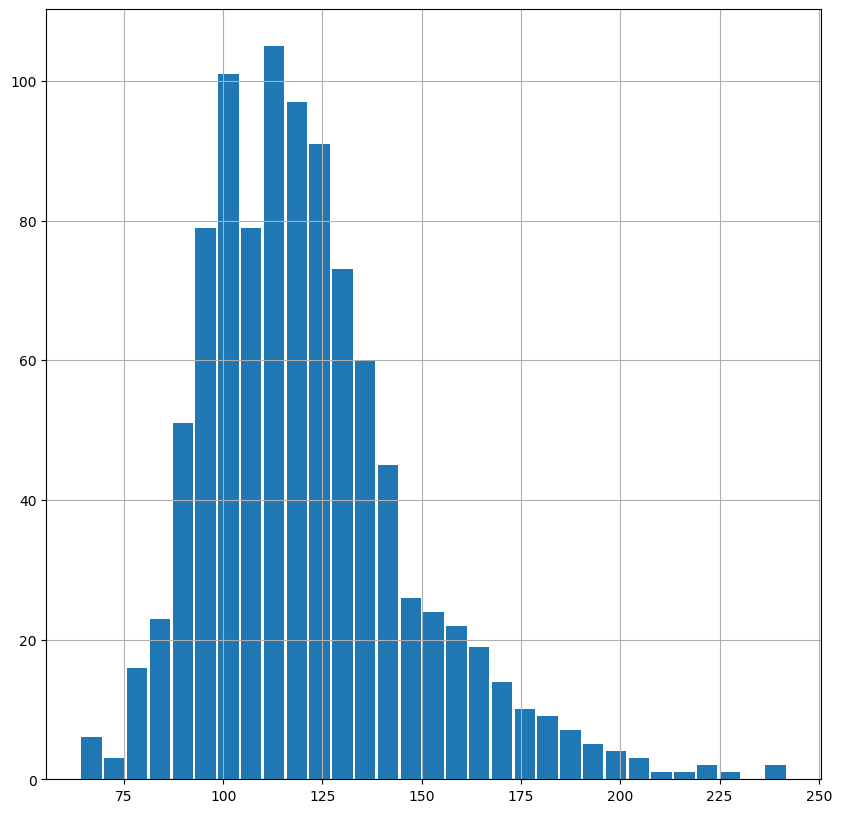

In [580]:
# Answer:
plt.style.use('default')
plt.figure(figsize=(10,10))
bin_size = sqrt(r)
movies['duration'].hist(bins=int(bin_size),rwidth = 0.9)

#### Use a box plot to display that same data.

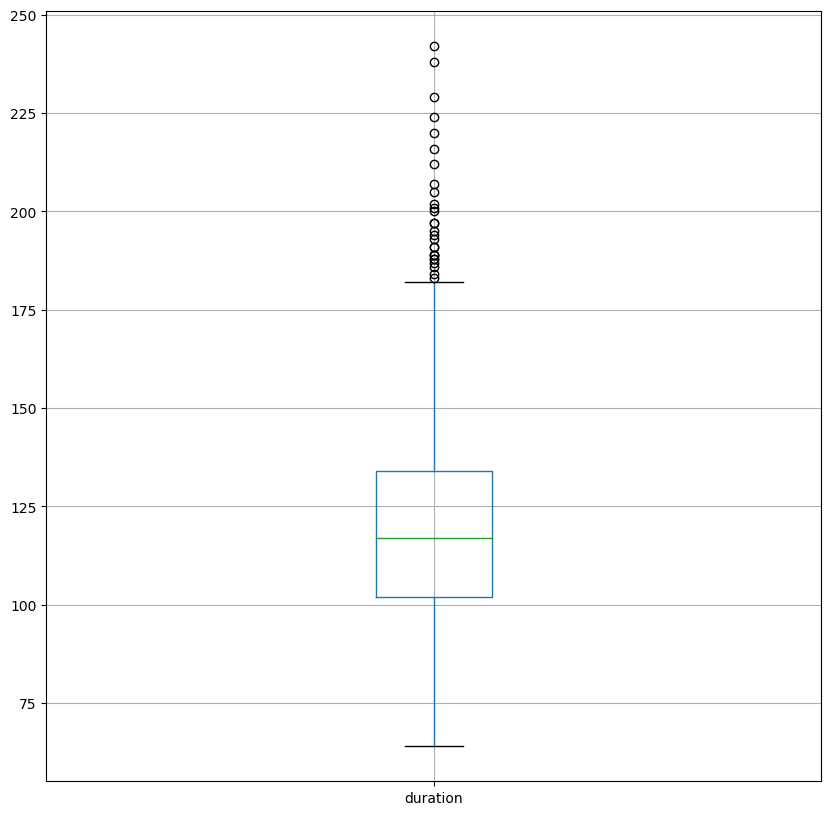

In [581]:
# Answer:
plt.figure(figsize=(10,10))

movies.boxplot(column = 'duration')

#did it with seaborn as well but the boxplot looks so derpy
#sns.boxplot(y = 'duration', data = movies, width = 0.2)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [582]:
# Answer:
#movies.groupby('content_rating').count()
occurance = movies['content_rating'].value_counts()
print(occurance)


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Content Ratings Spread')

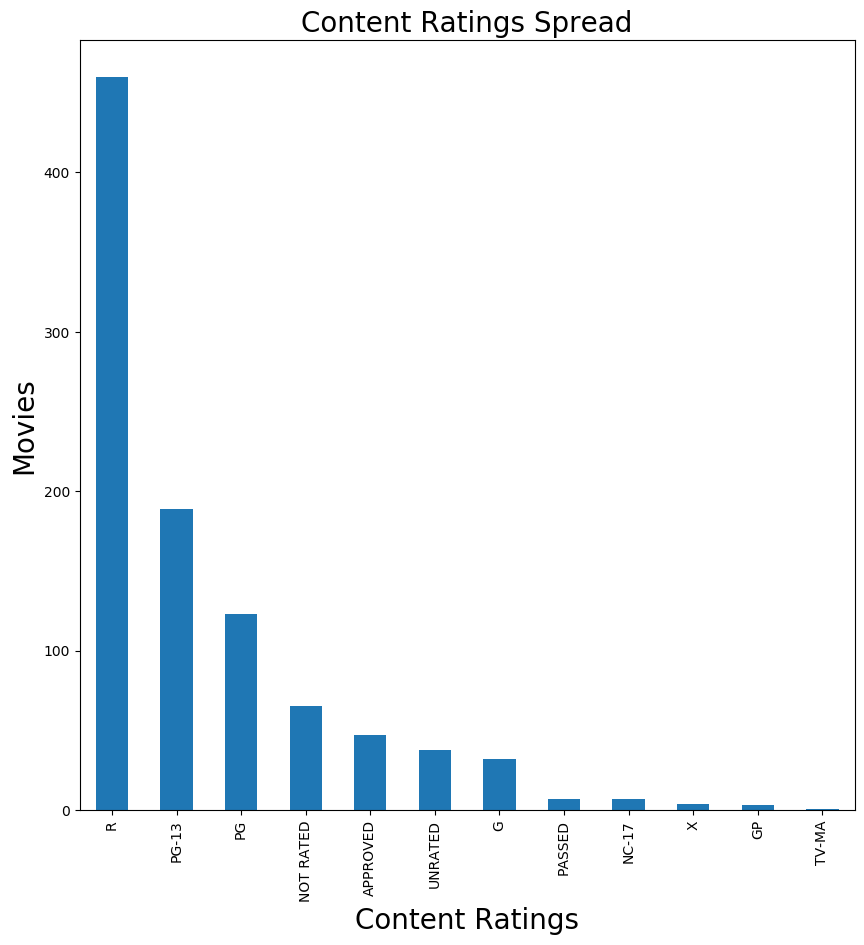

In [583]:
# Answer:
plt.figure(figsize=(10,10))
occurance.plot.bar()
plt.xlabel('Content Ratings',fontsize=20)
plt.ylabel('Movies',fontsize=20)
plt.title('Content Ratings Spread',fontsize=20)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [584]:
# Answer:

def unrated(rating):
    if rating == 'NOT RATED' or rating == 'APPROVED' or rating == 'PASSED' or rating == 'GP':
        return 'UNRATED'
    if rating == 'X' or rating == 'TV-MA':
        return 'NC-17'
    else:
        return rating

movies['content_rating'] = movies['content_rating'].apply(unrated)#.value_counts()
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

Text(0.5, 1.0, 'Content Ratings Spread')

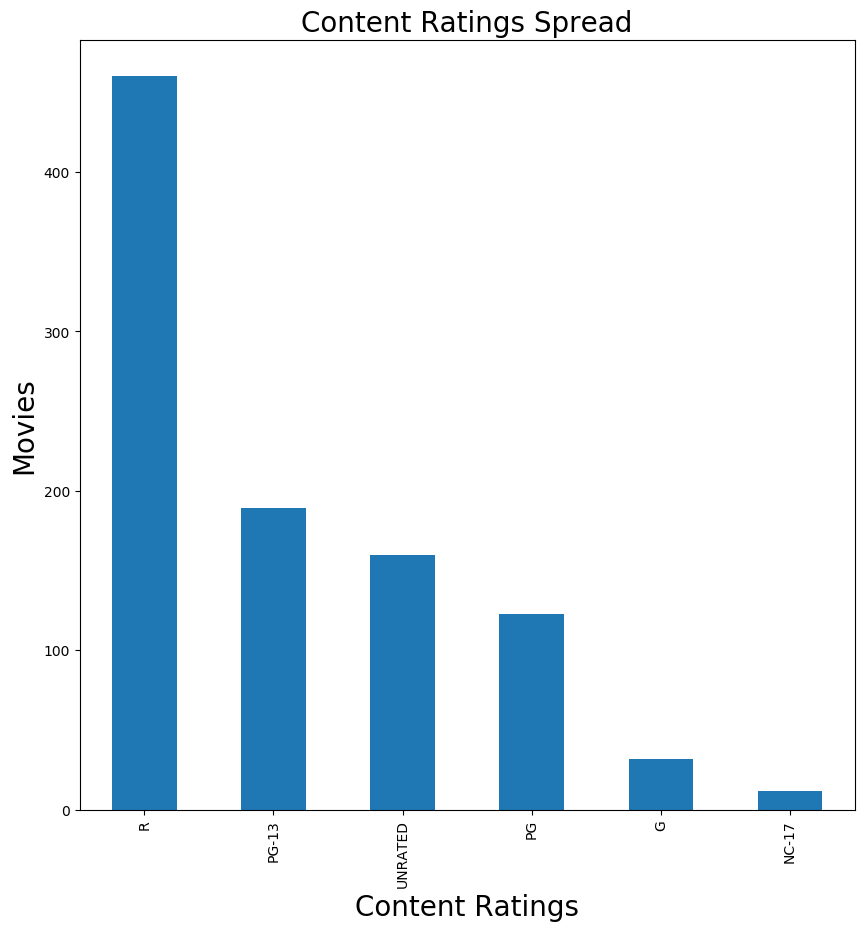

In [585]:
plt.figure(figsize=(10,10))
movies['content_rating'].value_counts().plot.bar()
plt.xlabel('Content Ratings',fontsize=20)
plt.ylabel('Movies',fontsize=20)
plt.title('Content Ratings Spread',fontsize=20)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [586]:
# Answer: check above, created a function that does it

#### Count the number of missing values in each column.

In [587]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [588]:
# Answer:

print(movies[movies.isnull().any(axis=1)].head())



     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  


In [589]:

# Well looking online at IMDB the ratings for Buth Cassidy is PG, for Eagles its PG and for True Grit its PG-13, the index 
# numbers are 187, 649 and 936. We change them specfically using loc. Wrong. You actually want to either do a mode imputation
# or fit the data to a more appropriate rating, which in this case would be UNRATED

#movies.loc[[187, 649], ['content_rating']] = 'PG'
#movies.loc[[936],['content_rating']] = 'PG-13'

movies.loc[[187, 649, 936], ['content_rating']] = 'UNRATED'
movies


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [590]:
# Answer:

movies_2hr = movies.loc[lambda movies: movies['duration'] >= 120]
movies_2hr.shape
movies_2hr.describe()

[star_mean_2hr] = movies_2hr[['star_rating']].mean()
#movies.describe()
print(star_mean_2hr)

7.948898678414082


#### Use a visualization to detect whether there is a relationship between duration and star rating.

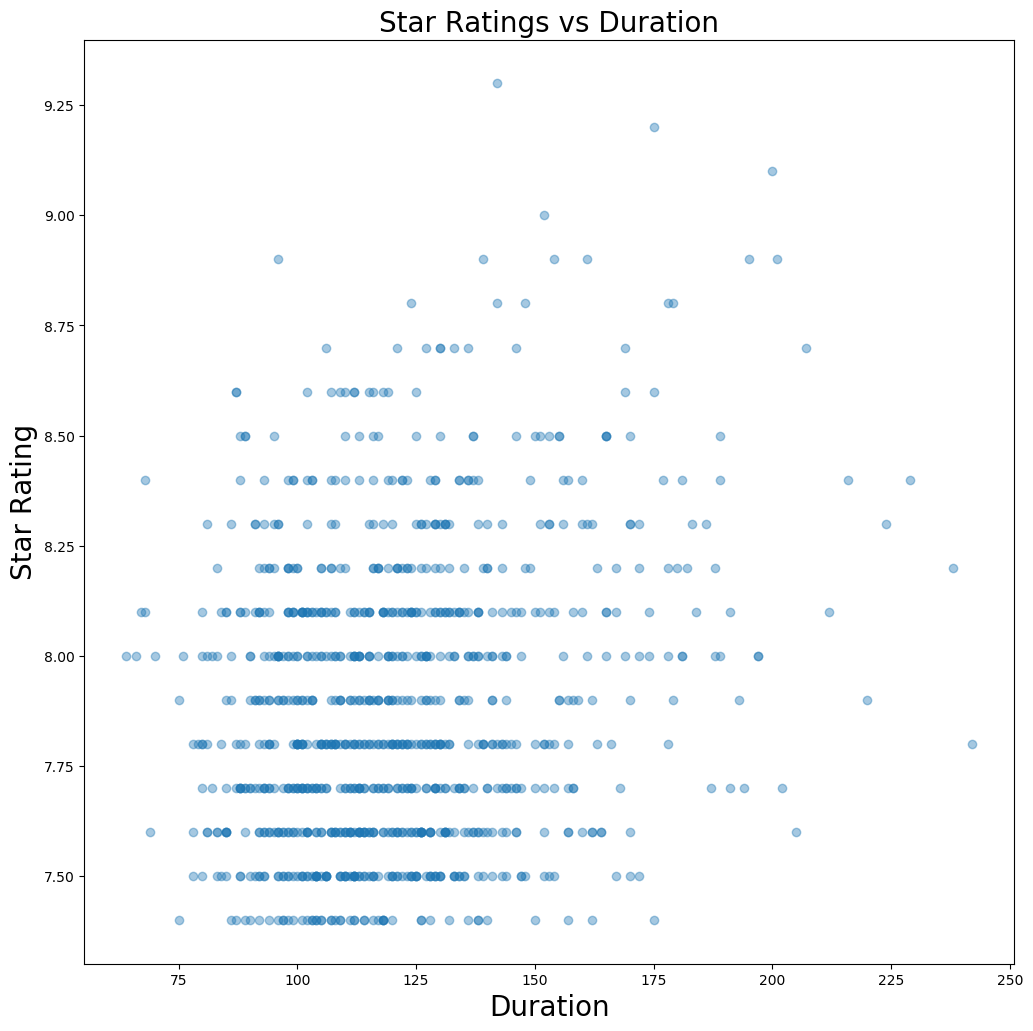

In [591]:
# Answer:
x = movies['duration']
y = movies['star_rating']


plt.figure(figsize=(12,12))
plt.scatter(x,y, alpha = 0.4)
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Star Rating',fontsize=20)
plt.title('Star Ratings vs Duration',fontsize=20)
plt.savefig('star_duration.png')

# Not a strong relationship


#### Calculate the average duration for each genre.

In [592]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

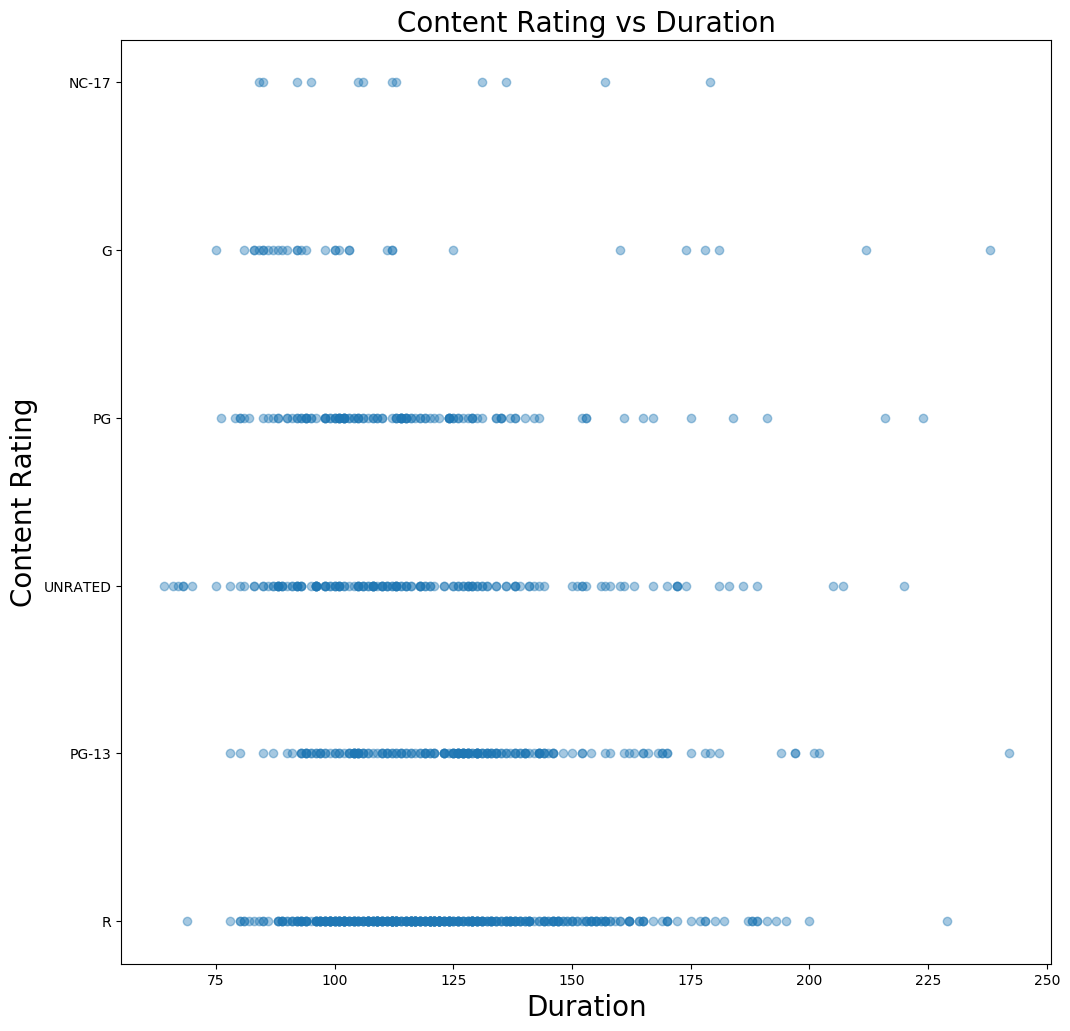

In [593]:
# Answer:
# Answer:
x = movies['duration']
y = movies['content_rating']


plt.figure(figsize=(12,12))
plt.scatter(x,y, alpha = 0.4)
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Content Rating',fontsize=20)
plt.title('Content Rating vs Duration',fontsize=20)
plt.savefig('Content_Rating.png')

#Not a strong relationship

#### Determine the top rated movie (by star rating) for each genre.

In [594]:
# Answer:

movies.groupby('genre').max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [595]:
# Answer:
movies[movies.duplicated()]

#There doesn't seem to be any duplicates in this dataframe

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [596]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [597]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [598]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [599]:
# Answer:

def genre_counter(number):
    if number >= 10:
        return number
    else:
        return None

    

genre_mean = movies.groupby(['genre']).mean()
genre_count = movies.genre.value_counts().to_frame().reset_index()
genre_count.columns = ['genre', 'count2']

genre_merged = pd.merge(genre_mean, genre_count, on='genre')

#Originally how I did it. Then I looked up online if there was a better way
genre_merged2 = genre_merged
genre_merged2['count2'] = genre_merged2['count2'].apply(genre_counter)
genre_merged2 = genre_merged2.dropna()
genre_merged2

#There was ...
genre_merged3 = genre_merged[genre_merged.count2 >= 10]
genre_merged3

,genre,star_rating,duration,count2
0,Action,7.884559,126.485294,136.0
1,Adventure,7.933333,134.840000,75.0
2,Animation,7.914516,96.596774,62.0
3,Biography,7.862338,131.844156,77.0
4,Comedy,7.822436,107.602564,156.0
5,Crime,7.916935,122.298387,124.0
6,Drama,7.902518,126.539568,278.0
11,Horror,7.806897,102.517241,29.0
12,Mystery,7.975000,115.625000,16.0


## Bonus

#### Figure out something "interesting" using the actors data!

In [600]:
movies['actors_list_length'] = movies.actors_list.apply(lambda x: len(x))
movies

# Check what data type actors_list is. As it turned out not to be a list

type(movies.actors_list)
#the list is a series, fat help that was

type(movies.actors_list[0]) #Turns out its a string


#First now need to turn the string in to a list. Create a function that takes in the mass string, and splits according 
# to the comma

def string_split(string):
    return list(string.split(","))

movies['actors_list'] = movies.actors_list.apply(string_split)
movies['actors_list_length'] = movies.actors_list.apply(lambda x: len(x))
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,actors_list_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[[u'Tim Robbins', u'Morgan Freeman', u'Bob G...",3
1,9.2,The Godfather,R,Crime,175,"[[u'Marlon Brando', u'Al Pacino', u'James Ca...",3
2,9.1,The Godfather: Part II,R,Crime,200,"[[u'Al Pacino', u'Robert De Niro', u'Robert ...",3
3,9.0,The Dark Knight,PG-13,Action,152,"[[u'Christian Bale', u'Heath Ledger', u'Aaro...",3
4,8.9,Pulp Fiction,R,Crime,154,"[[u'John Travolta', u'Uma Thurman', u'Samuel...",3


In [601]:
#This nifty line turns the list in the actors_list and makes individual columns for them, as we know each has 3, we can
# just make 3 columns labeled as so
movies[['actor_1','actor_2','actor_3']] = pd.DataFrame(movies.actors_list.values.tolist(), index= movies.index)

# Clean up the Strings
def string_clean(word):
    word = word.replace("\'", '') #This gets rid of all ', which might make some names weird. but this saves making a 
                                    # a seperate function. perhaps an If statement might work
    word = word.replace("[", '')
    word = word.replace("]", '')
    if word[0] == " ":
        word = word[1:]
    word = word.replace('\"','')
    word = word[1:]
    return word

# Not sure how to clean all columns except do it individually
movies['actor_1'] = movies.actor_1.apply(string_clean)
movies['actor_2'] = movies.actor_2.apply(string_clean)
movies['actor_3'] = movies.actor_3.apply(string_clean)

# Looking at the data there are still some odd characters, but they will be hard to clean, as it is based on non english 
# letters. Also the clean got rid of all ' , so come actors like O'Toole just become OToole. Probably a better way of 
# doing this
movies

#Now we dont need the actors_list and actors_list_length so we drop it
movies.drop(['actors_list', 'actors_list_length'], axis=1)

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson
5,8.9,12 Angry Men,UNRATED,Drama,96,Henry Fonda,Lee J. Cobb,Martin Balsam
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,Clint Eastwood,Eli Wallach,Lee Van Cleef
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,Elijah Wood,Viggo Mortensen,Ian McKellen
8,8.9,Schindler's List,R,Biography,195,Liam Neeson,Ralph Fiennes,Ben Kingsley
9,8.9,Fight Club,R,Drama,139,Brad Pitt,Edward Norton,Helena Bonham Carter


In [602]:
# Lets create some individual dataframes with each actor list

actors1 = movies[['actor_1','star_rating','content_rating','genre','duration']]
actors2 = movies[['actor_2','star_rating','content_rating','genre','duration']]
actors3 = movies[['actor_3','star_rating','content_rating','genre','duration']]

# lets rename the actor columns and star_rating columns to avoid confusion

actors1.rename(columns={'actor_1':'actor', 'star_rating':'movie_rating'}, inplace=True)
actors2.rename(columns={'actor_2':'actor', 'star_rating':'movie_rating'}, inplace=True)
actors3.rename(columns={'actor_3':'actor', 'star_rating':'movie_rating'}, inplace=True)

actor = pd.concat([actors1, actors2, actors3], ignore_index=True)
actor.reset_index()
actor


C:\Users\Rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,actor,movie_rating,content_rating,genre,duration
0,Tim Robbins,9.3,R,Crime,142
1,Marlon Brando,9.2,R,Crime,175
2,Al Pacino,9.1,R,Crime,200
3,Christian Bale,9.0,PG-13,Action,152
4,John Travolta,8.9,R,Crime,154
5,Henry Fonda,8.9,UNRATED,Drama,96
6,Clint Eastwood,8.9,UNRATED,Western,161
7,Elijah Wood,8.9,PG-13,Adventure,201
8,Liam Neeson,8.9,R,Biography,195
9,Brad Pitt,8.9,R,Drama,139


In [603]:
# Lets determine the average movie rating for each actor

h = actor.groupby('actor')['movie_rating'].mean()
sorted_actor = h.to_frame().sort_values('movie_rating', ascending=False)

top_10 = sorted_actor[:10]
top_10.rename(columns={'movie_rating':'avg_movie_rating'}, inplace=True)
top_10

#These are the Top 10 Actors with the Highest Average Movie Rating

,avg_movie_rating
actor,
Bob Gunton,9.3
John Travolta,8.9
Martin Balsam,8.9
Eli Wallach,8.9
Alexandre Rodrigues,8.7
Matheus Nachtergaele,8.7
Leandro Firmino,8.7
Michael Berryman,8.7
Donna Reed,8.7


In [607]:
# Lets also determine how many people act in each genre

genre_actor = actor['genre'].value_counts()
genre_actor

Drama        834
Comedy       468
Action       408
Crime        372
Biography    231
Adventure    225
Animation    186
Horror        87
Mystery       48
Western       27
Sci-Fi        15
Thriller      15
Film-Noir      9
Family         6
History        3
Fantasy        3
Name: genre, dtype: int64

Text(0.5, 1.0, 'Genre that has the most Actors')

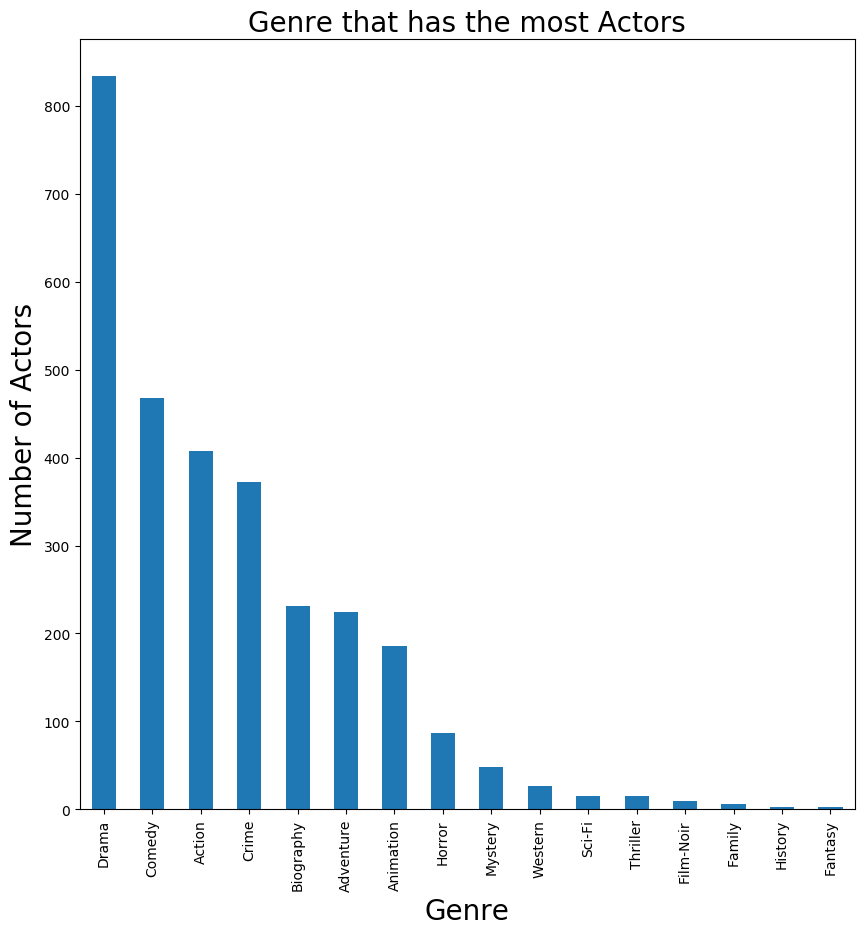

In [609]:
plt.figure(figsize=(10,10))
genre_actor.plot.bar()
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Number of Actors',fontsize=20)
plt.title('Genre that has the most Actors',fontsize=20)